In [11]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#Assignment: 08 - ANN
#Description: Implementation of ANN

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/HW8/'
file='wisc_bc_ContinuousVar.csv'
data = pd.read_csv(folder+file)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, 2:]
y = data.iloc[:, 1]

y = y.map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
ann_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
y_pred = ann_model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9707602339181286


In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.95      0.99      0.97        73

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[94  4]
 [ 1 72]]


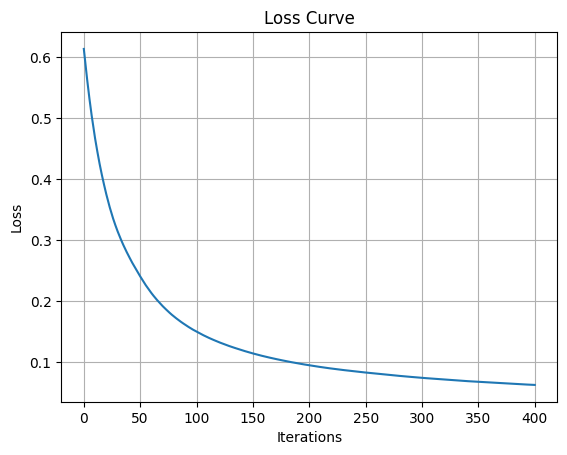

In [20]:
plt.plot(ann_model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()